# Data Access with Zipline

Zipline is the algorithmic trading library that used to power the now-defunct Quantopian backtesting and live-trading platform. It is also available offline to develop a strategy using a limited number of free data bundles that can be ingested and used to test the performance of trading ideas.

## Zipline installation

## Imports & Settings

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
%load_ext zipline

In [3]:
from zipline.api import *
import logbook
log = logbook.Logger('algo')

## Zipline Ingest Data

##### 2021-09-18 11:54:16 

## Data

### Portfolio and Benchmark

In [4]:
import numpy as np
import pandas as pd
from trading_calendars import get_calendar

### Ingest Data

In [5]:
!zipline bundles

alpaca_csv <no ingestions>
alpaca_direct 2021-11-12 08:41:45.074940
csvdir 2021-10-22 20:16:58.509372
quandl 2021-09-12 09:12:19.965686
quantopian-quandl 2021-02-12 09:36:13.693885
yahoo_direct 2021-11-20 07:48:25.887073
yahoo_direct 2021-11-14 11:27:54.154874


In [6]:
!zipline clean -b yahoo_direct --keep-last 1

[2021-11-20 16:39:21.306280] INFO: zipline.data.bundles.core: Cleaning 2021-11-14T11;27;54.154874.


In [7]:
!YAHOO_SYM_LST=SPY,MSFT,GOOGL,BLK,AMD,AAPL,TSLA,MTCH zipline ingest -b yahoo_direct

[2021-11-20 16:39:25.221575] INFO: zipline.data.bundles.core: Ingesting yahoo_direct.
[2021-11-20 16:39:25.221714] INFO: zipline.data.bundles.ingester: symbols are: ('AMD', 'TSLA', 'BLK', 'MTCH', 'SPY', 'MSFT', 'GOOGL', 'AAPL')
[2021-11-20 16:39:25.223840] INFO: zipline.data.bundles.ingester: writing data...
2010-01-04  9.79  9.90  9.68   9.70  18748700         0      1
2010-01-05  9.71  9.90  9.68   9.71  22145700         0      1
2010-01-06  9.68  9.76  9.55   9.57  18643400         0      1
2010-06-29  3.800  5.000  3.508  4.778  93831500         0      1
2010-06-30  5.158  6.084  4.660  4.766  85935500         0      1
2010-07-01  5.000  5.184  4.054  4.392  41094000         0      1
2010-01-04  236.050003  239.600006  233.520004  ...  238700         0      1
2010-01-05  239.050003  239.669998  236.759995  ...  198800         0      1
2010-01-06  238.509995  238.649994  234.059998  ...  278500         0      1

[3 rows x 7 columns]
2010-01-04  5.890919  5.962307  5.839520  5.856653

### Data access using zipline

The following code illustrates how zipline permits us to access daily stock data for a range of companies. You can run zipline scripts in the Jupyter Notebook using the magic function of the same name.

First, you need to initialize the context with the desired security symbols. We'll also use a counter variable. Then zipline calls handle_data, where we use the `data.history()` method to look back a single period and append the data for the last day to a .csv file:

In [8]:
%%zipline --start 2010-10-1 --end 2021-10-1 --data-frequency daily --benchmark-symbol SPY --bundle yahoo_direct
from zipline.api import order_target, record, symbol
import pandas as pd


def initialize(context):
    context.i = 0
    context.assets = [symbol('BLK'), symbol('TSLA'), symbol('MTCH'), symbol('MSFT'),symbol('GOOGL'), symbol('AAPL'), symbol('AMD'),]
    
def handle_data(context, data):
    df = data.history(context.assets, fields=['price', 'volume'], bar_count=1, frequency="1d")
    df = df.reset_index()
    
    if context.i == 0:
        df.columns = ['date', 'asset', 'price', 'volume']
        df.to_csv('zipline/portfolio_data.csv', index=False)
    else:
        df.to_csv('zipline/portfolio_data.csv', index=False, mode='a', header=None)
    context.i += 1

/Users/mw/opt/anaconda3/envs/zip38/lib/python3.8/site-packages/empyrical/stats.py:706: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
/Users/mw/opt/anaconda3/envs/zip38/lib/python3.8/site-packages/empyrical/stats.py:797: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


,period_open,period_close,ending_value,starting_cash,ending_cash,portfolio_value,returns,longs_count,shorts_count,long_value,...,trading_days,period_label,algorithm_period_return,algo_volatility,benchmark_period_return,benchmark_volatility,alpha,beta,sharpe,sortino
2010-10-01 20:00:00+00:00,2010-10-01 13:31:00+00:00,2010-10-01 20:00:00+00:00,0.0,10000000.0,10000000.0,10000000.0,0.0,0,0,0.0,...,1,2010-10,0.0,NaN,0.004206,NaN,NaN,NaN,None,None
2010-10-04 20:00:00+00:00,2010-10-04 13:31:00+00:00,2010-10-04 20:00:00+00:00,0.0,10000000.0,10000000.0,10000000.0,0.0,0,0,0.0,...,2,2010-10,0.0,0.0,-0.003330,0.131438,0.0,0.0,None,None
2010-10-05 20:00:00+00:00,2010-10-05 13:31:00+00:00,2010-10-05 20:00:00+00:00,0.0,10000000.0,10000000.0,10000000.0,0.0,0,0,0.0,...,3,2010-10,0.0,0.0,0.016735,0.220200,0.0,0.0,None,None
2010-10-06 20:00:00+00:00,2010-10-06 13:31:00+00:00,2010-10-06 20:00:00+00:00,0.0,10000000.0,10000000.0,10000000.0,0.0,0,0,0.0,...,4,2010-10,0.0,0.0,0.016648,0.185393,0.0,0.0,None,None
2010-10-07 20:00:00+00:00,2010-10-07 13:31:00+00:00,2010-10-07 20:00:00+00:00,0.0,10000000.0,10000000.0,10000000.0,0.0,0,0,0.0,...,5,2010-10,0.0,0.0,0.015421,0.165057,0.0,0.0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-27 20:00:00+00:00,2021-09-27 13:31:00+00:00,2021-09-27 20:00:00+00:00,0.0,10000000.0,10000000.0,10000000.0,0.0,0,0,0.0,...,2766,2021-09,0.0,0.0,2.878384,0.168745,0.0,0.0,None,None
2021-09-28 20:00:00+00:00,2021-09-28 13:31:00+00:00,2021-09-28 20:00:00+00:00,0.0,10000000.0,10000000.0,10000000.0,0.0,0,0,0.0,...,2767,2021-09,0.0,0.0,2.800228,0.168830,0.0,0.0,None,None
2021-09-29 20:00:00+00:00,2021-09-29 13:31:00+00:00,2021-09-29 20:00:00+00:00,0.0,10000000.0,10000000.0,10000000.0,0.0,0,0,0.0,...,2768,2021-09,0.0,0.0,2.806624,0.168800,0.0,0.0,None,None
2021-09-30 20:00:00+00:00,2021-09-30 13:31:00+00:00,2021-09-30 20:00:00+00:00,0.0,10000000.0,10000000.0,10000000.0,0.0,0,0,0.0,...,2769,2021-09,0.0,0.0,2.760098,0.168814,0.0,0.0,None,None


We can plot the data as follows:

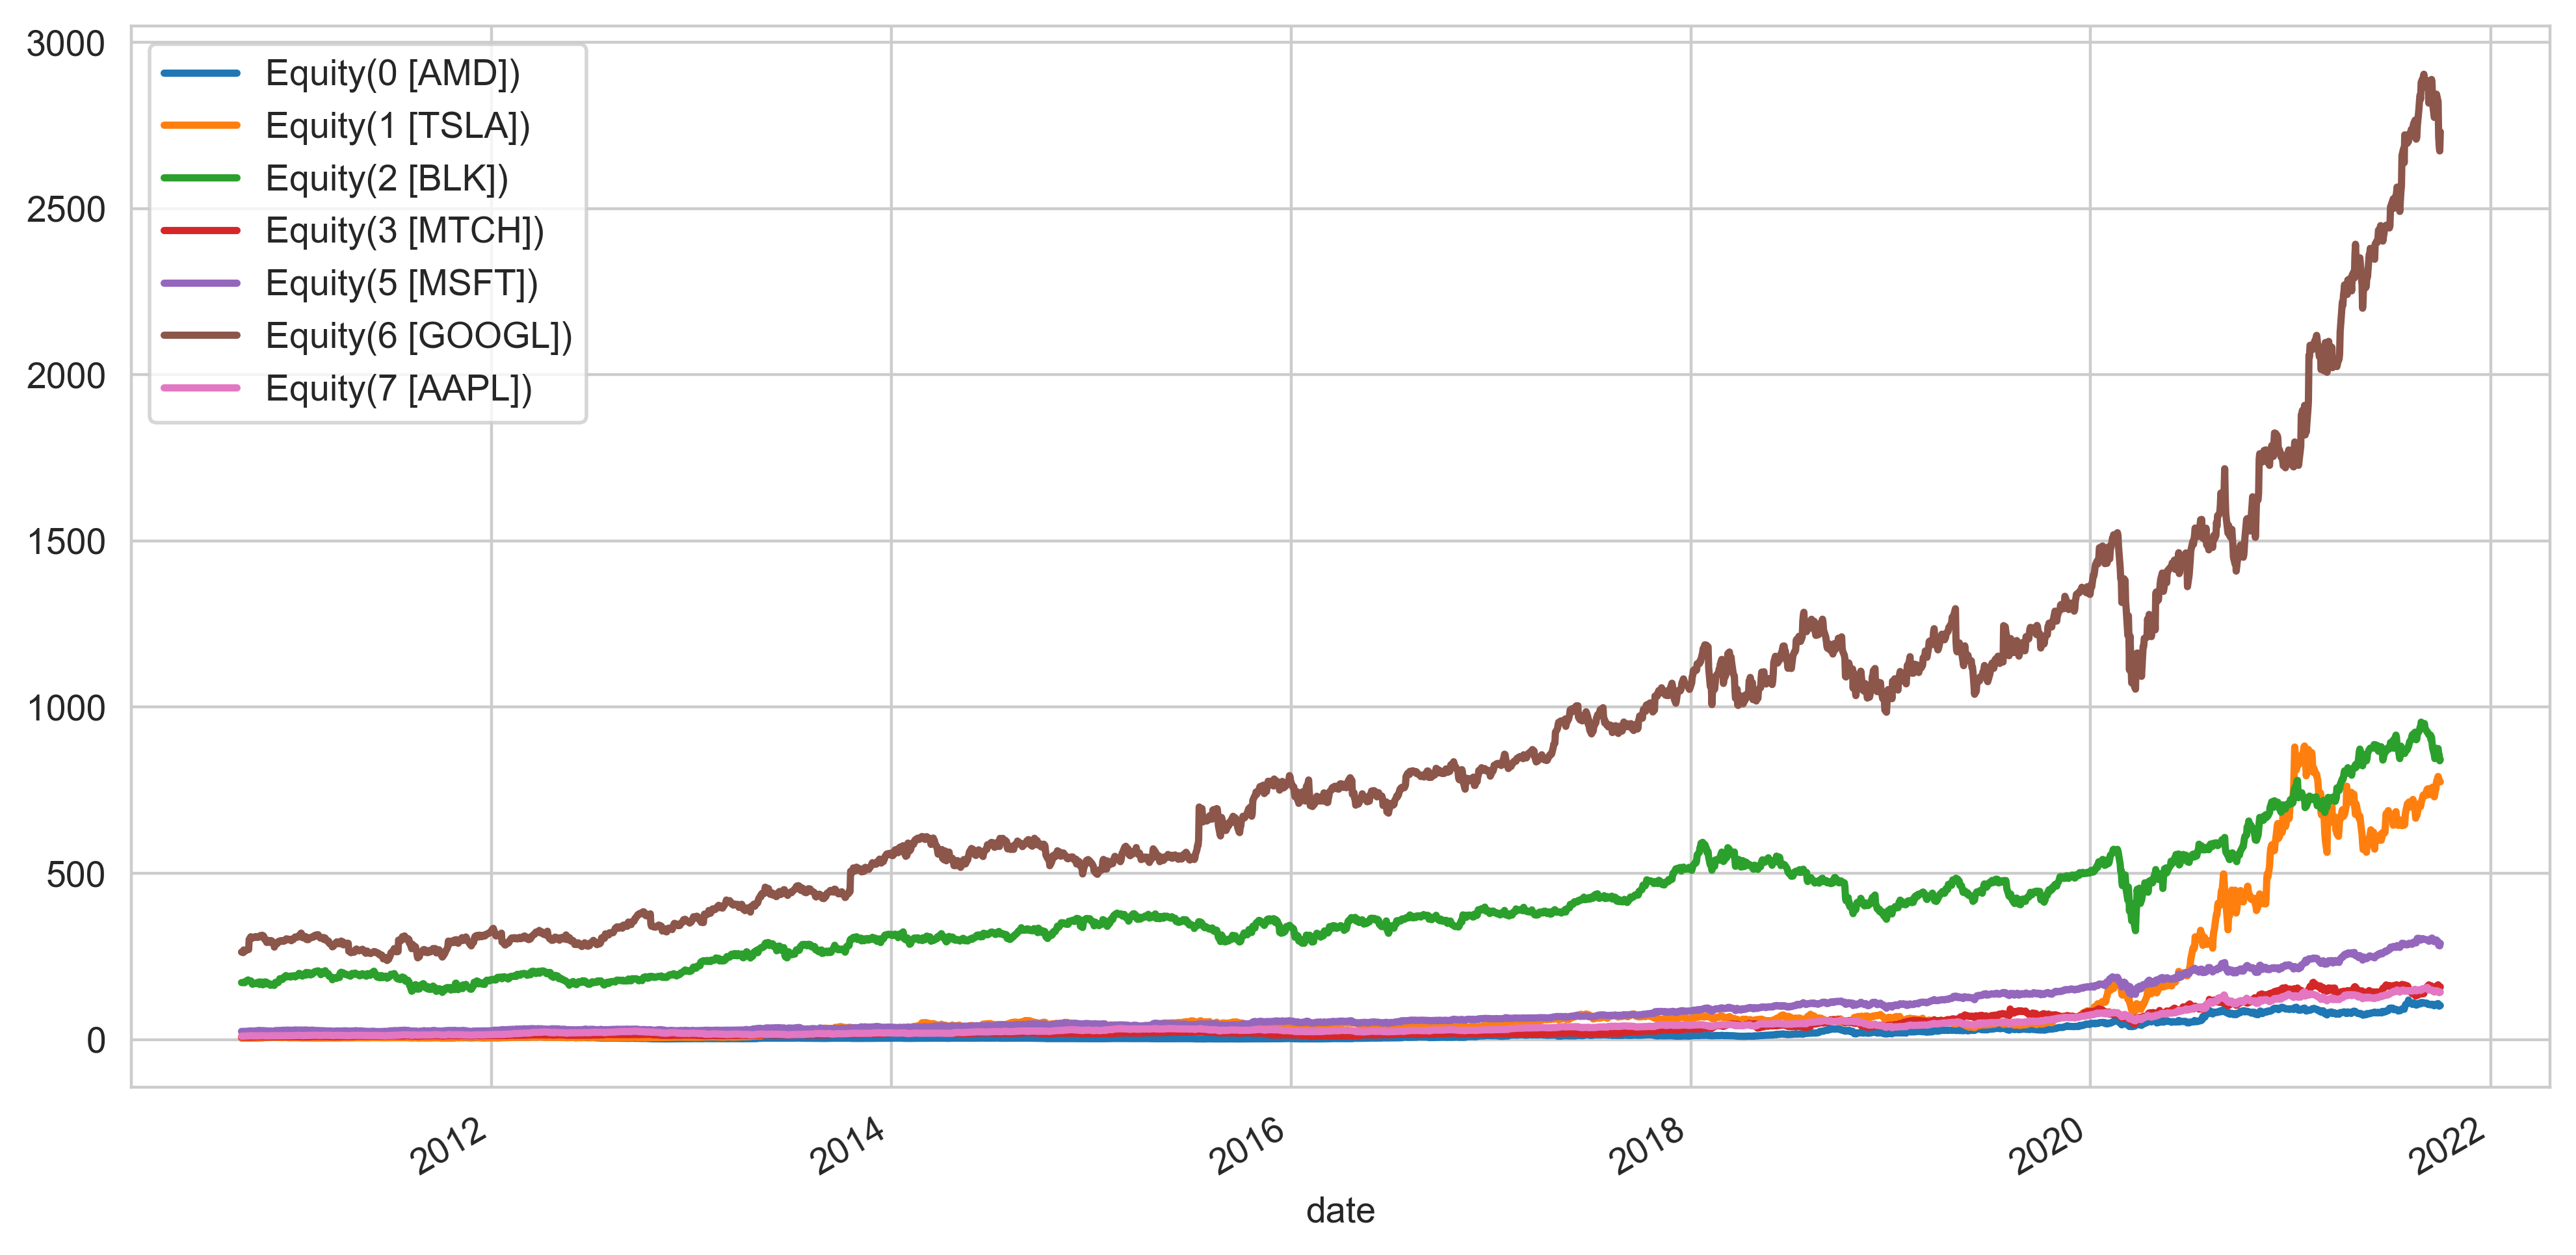

In [9]:
import seaborn as sns
import matplotlib.pylab as plt
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 200
%config InlineBackend.figure_format = 'retina'

df = pd.read_csv('zipline/portfolio_data.csv')
df.date = pd.to_datetime(df.date)
df.set_index('date').groupby('asset').price.plot(lw=2, legend=True, figsize=(12, 6))
plt.savefig(('results/zipline_data'), dpi=300);